# Сборный проект -1

В вашем распоряжении исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 г. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Нужно отработать принцип работы с данными для прогноза продаж последующих годов по данным предшествующих.   
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**   
Выявить определяющие успешность игры закономерности.

**Ход исследования**

Исторические данные о продажах игр получим из файла `games.csv`. О качестве данных ничего неизвестно. Поэтому перед проведением анализа и проверкой гипотез понадобится обзор и предобработка данных. Обработаем пропуски, исправим названия и типы данных в столбцах,удалим дубликаты в данных, а также редкие и выбивающиеся значения. 
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Составление портрета пользователя каждого региона.
 5. Проверка гипотез.
 

### Откроем файл с данными и изучим общую информацию. 

1.1. Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

1.2. Выведем первые 20 строчек датафрейма data на экран:

In [2]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


1.3. Выведем основную информацию о датафрейме с помощью метода info():

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


1.4. Построим общую гистограмму для всех столбцов таблицы: 

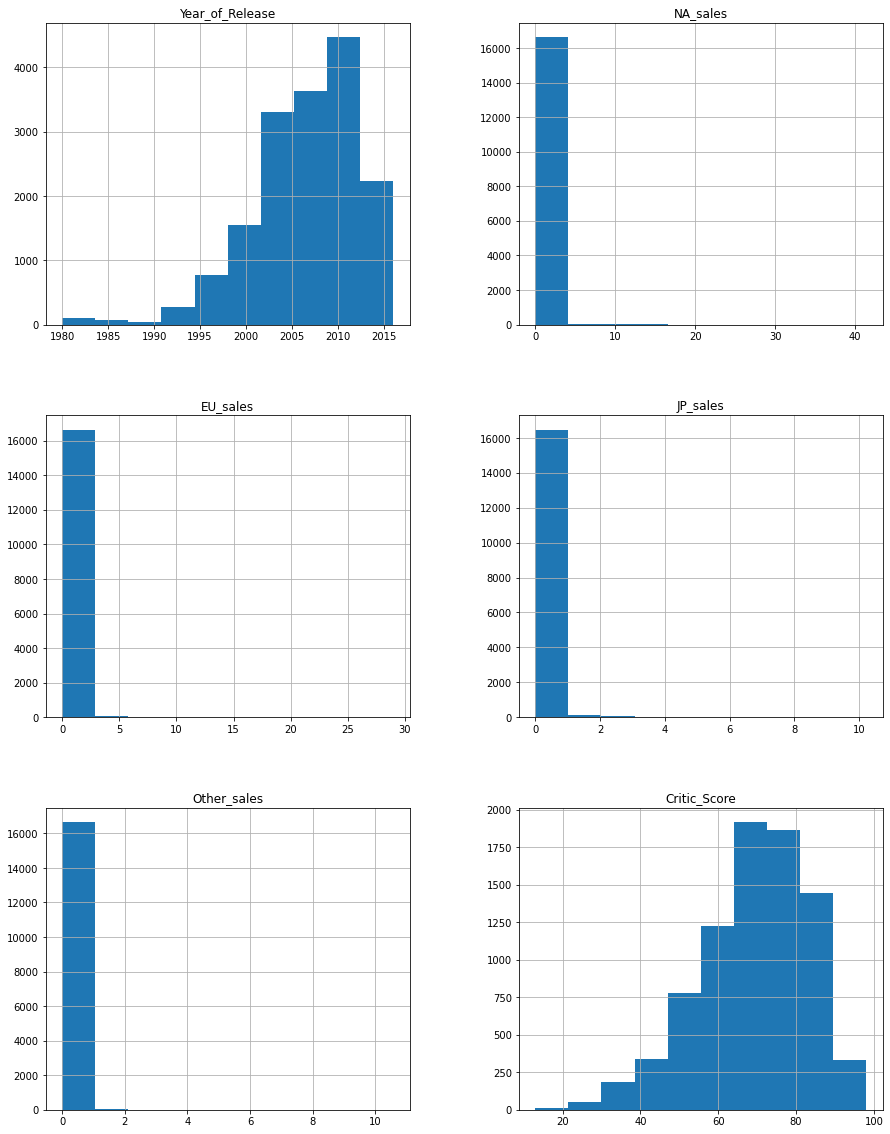

In [4]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

#### Названия столбцов

##### Заменим названия столбцов (приведем к нижнему регистру):

In [5]:
data.columns = data.columns.str.lower()

#### Обработка пропусков

##### Перед  преобразованием типов данных в столбцах удобно сначала найти и изучить пропущенные значения в столбцах:

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Из результатов видно, что пропуски имеются в столбцах: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`,
`rating`.

##### Построим температурный график по количеству пропусков:

In [7]:
pd.DataFrame(data.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})

,Пропуски
name,0%
year_of_release,2%
genre,0%
critic_score,51%
user_score,40%
rating,40%


##### Возможные причины появления пропусков в исходных данных:

Изучим по-подробнее состав данных в столбцах с большим количеством пропусков:

In [8]:
data['critic_score'].value_counts(dropna=False)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: critic_score, Length: 83, dtype: int64

In [9]:
data['user_score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
2.3       2
0.7       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [10]:
data['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Возможные причины появления пропусков в исходных данных:
Существенное число пропусков говорит о том, что они неслучайны и могли возникнуть по причине неполного заполнения данных, ошибки на этапе выгрузки данных, либо в результате неправильного запроса/объединения таблиц. Проанализировав строки с пропусками и состав данных, сделали следующие предположения: пропуски в столбце `user_score` и значения "tbd" (to be determined) несут в себе одну смысловую информацию (оценка не определена). Пропуски в графе `rating` могут быть связаны не только с ошибкой в данных, но и с тем, что для данных игр по каким-либо причинам оценка рейтинга ESRB не требовалась, либо при оценке игрового контента однозначно присвоить подходящую возрастную категорию не удалось.

##### Избавимся от пропусков, составляющих незначительную часть данных:

In [11]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre']).reset_index(drop=True)
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Проверим отсутствие пропусков:

In [12]:
data.name.isna().sum()

0

In [13]:
data.genre.isna().sum()

0

In [14]:
data.year_of_release.isna().sum()

0

##### Заполним пропуски в столбце `rating` на значение `'undef'`:

In [15]:
data.rating.isna().sum()

6676

In [16]:
data.rating = data.rating.fillna('undef')
data.rating.head()

0        E
1    undef
2        E
3        E
4    undef
Name: rating, dtype: object

Проверим отсутствие пропусков:

In [17]:
data.rating.isna().sum()

0

##### Логичную замену в осталных столбцах предложить невозможно, поэтому на данном этапе оставим эти значения пустыми. Посмотрим на оставшееся количество пропусков:

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

#### Типы данных в столбцах


##### Найдем столбцы, в которых нужно изменить тип данных:

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undef
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undef


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [21]:
data.year_of_release.value_counts().head(10)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
Name: year_of_release, dtype: int64

In [22]:
data.critic_score.value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

In [23]:
data.user_score.value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
1.9       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Очевидно, что данные в столбце `year_of_release` должны иметь тип int64, т.к. это всегда целые числа. Данные в столбце`critic_score` это тоже всегда целые числа, но, т.к. в них имеется большое количество пропусков,которые нельзя заменить логическими значениями и удалить также нельзя, - то на данном этапе оставим их float64. Данные столбца `user_score`  - это в основном вещественные числа, которые также содержат NaN и строковые значения "tbd" (to be determined). Мы можем изменить тип данных на float64, при этом значения "tbd" также станут NaN, на данном этапе это нам подходит.

##### Выполним соответствующие преобразования:

In [24]:
data.year_of_release = data.year_of_release.astype('int')
data.year_of_release.head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

In [25]:
data.user_score = pd.to_numeric(data.user_score, errors='coerce')
data.user_score.head()

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Поиск и удаление дубликатов


##### Перед поиском дубликатов приведем к нижнему регистру все текстовые значения:


In [27]:
data.name = data.name.str.lower()
data.platform = data.platform.str.lower()
data.genre = data.genre.str.lower()
data.rating = data.rating.str.lower()

##### Проверим данные на наличие явных дубликатов:


In [28]:
data.duplicated().sum()

0

Явных дубликатов на данном этапе не обнаружено.

##### Изучим уникальные значения в столбце `name` с названиями игр:

In [29]:
len(data.name.sort_values().unique())

11426

In [30]:
data.name.sort_values().unique()[:50]

array([' beyblade burst', ' fire emblem fates', " frozen: olaf's quest",
       ' haikyu!! cross team match!', ' tales of xillia 2', "'98 koshien",
       '.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)',
       '.hack//g.u. vol.3//redemption', '.hack//infection part 1',
       '.hack//link', '.hack//mutation part 2', '.hack//outbreak part 3',
       '.hack//quarantine part 4: the final chapter',
       '.hack: sekai no mukou ni + versus', '007 racing',
       '007: quantum of solace', '007: the world is not enough',
       '007: tomorrow never dies', '1 vs. 100', '1/2 summer +',
       '10 minute solution', '100 all-time favorites',
       '100 classic books', '100 classic games',
       '1000 cooking recipes from elle à table', '1001 touch games',
       '101-in-1 explosive megamix', '101-in-1 party megamix wii',
       '101-in-1 sports megamix', '101-in-1 sports party megamix',
       '1080°: teneighty snowboarding', '11e

По выбранной части неявных дубликатов не обнаружено. Но визуально трудно оценить список целиком, поэтому на этом этапе оставим названия игр без изменений.

##### Изучим уникальные значения в столбце `platform` с названиями платформ:

In [31]:
data.platform.sort_values().unique()

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

Неявных дубликатов не обнаружено.

##### Изучим уникальные значения в столбце `year_of_release` с годами релизов:

In [32]:
data.year_of_release.sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Неявных дубликатов не обнаружено.

##### Изучим уникальные значения в столбце `genre` с названиями жанров:

In [33]:
data.genre.sort_values().unique()

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

Неявных дубликатов не обнаружено.

##### Изучим уникальные значения в столбце `rating` с категориями игр:

In [34]:
data.rating.sort_values().unique()

array(['ao', 'e', 'e10+', 'ec', 'k-a', 'm', 'rp', 't', 'undef'],
      dtype=object)

Неявных дубликатов не обнаружено.

#### Проверим, есть ли явные аномальные значения (отрицательные) в значениях продаж и оценках критиков и пользоваталей:¶


In [35]:
len(data[data.eu_sales < 0])

0

In [36]:
len(data[data.na_sales < 0])

0

In [37]:
len(data[data.jp_sales < 0])

0

In [38]:
len(data[data.other_sales < 0])

0

In [39]:
len(data[data.critic_score < 0])

0

In [40]:
len(data[data.user_score < 0])

0

Явные аномалии отсутствуют.

#### Посчитаем и добавим в таблицу данные о суммарных продажах во всех регионах

In [41]:
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

### Проведем исследовательский анализ данных

#### Изучим, сколько игр выпускалось в разные годы:


In [42]:
len(data.year_of_release.unique())

37

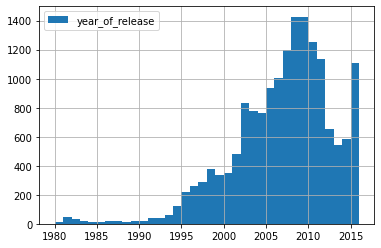

In [43]:
data['year_of_release'].hist(bins=36, legend='year_of_release')
plt.show()

Больше всего игр выпускалось в 2008 и 2009 гг. Доля игр, выпущенных до 1995 г., мала, и для анализа они не важны.

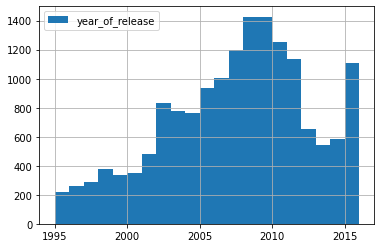

In [44]:
data['year_of_release'].hist(bins=21, range=(1995,2016), legend='year_of_release')
plt.show()

Сформируем новый набор данных, исключив эти значения:

In [45]:
good_data = data.query('year_of_release >= 1995').reset_index(drop=True)

#### Посмотрим, как менялись продажи по платформам:

##### Оценим общее количество платформ:

In [46]:
len(good_data.platform.unique())

26

##### Найдем платформы с наибольшими суммарными продажами:

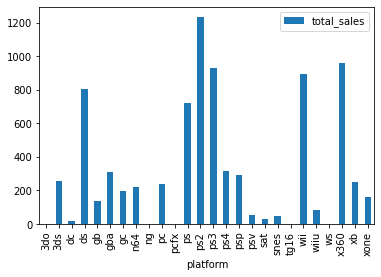

In [47]:
good_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(y='total_sales', kind='bar');

Из гистограммы видно, что наболее продаваемыми оказались игры 6 платформ с суммарными продажами более 600 млн копий. Определим их названия:

In [48]:
top_platforms = good_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_platforms

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.76
ps,721.55


##### Построим графики распределения продаж по годам для полученных платформ с наибольшими суммарными продажами:

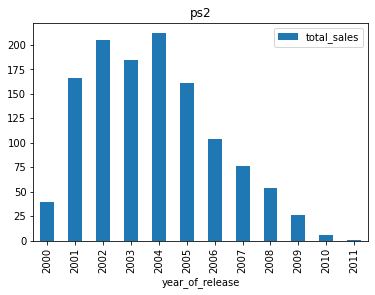

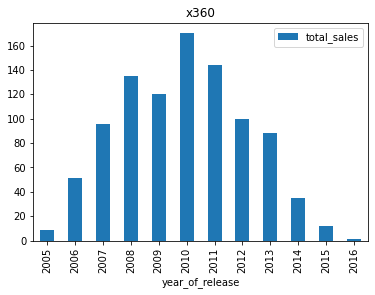

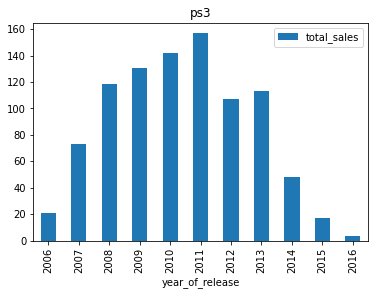

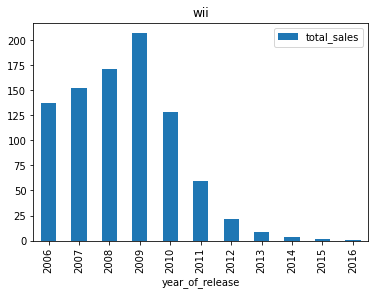

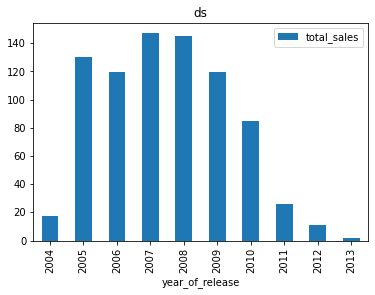

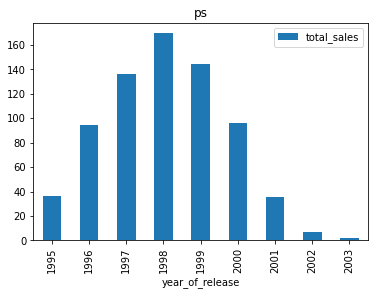

In [49]:
for p in top_platforms.index:
    (good_data.query('platform == @p')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', title=p)
    )
    plt.show()

Из графиков видим, что платформы появлялись и исчезали в разные годы, но в среднем период популярности платформы составляет 6-7 лет. Также из графиков получили наблюдение, что к 2013-2014 году самые популярные платформы практически исчезли из продаж. Для определения актуального периода для прогноза на 2017 г посмотрим динамику продаж по годам по всем платформам и оценим, когда начали появляться новые перспективные платформы:

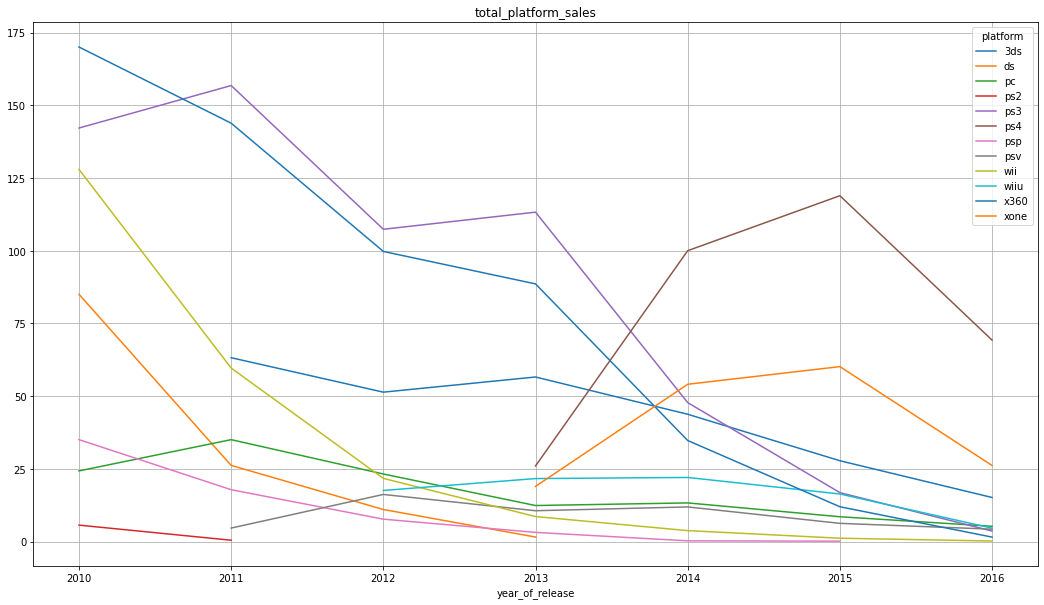

In [50]:
(good_data
    .query('year_of_release >= 2010')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(title='total_platform_sales', grid=True, figsize=(18, 10)));

Из полученного графика видим, что в 2013 г. начали появляться новые перспективные платформы. С учетом того, что компьютерные игры - это динамично меняющаяся индустрия,в качестве актуального периода для формирования прогноза на 2017 г. возьмем для анализа данные начиная с 2014 года.

#### Проанализируем данные по продажам игр разных платформ за актуальный период:

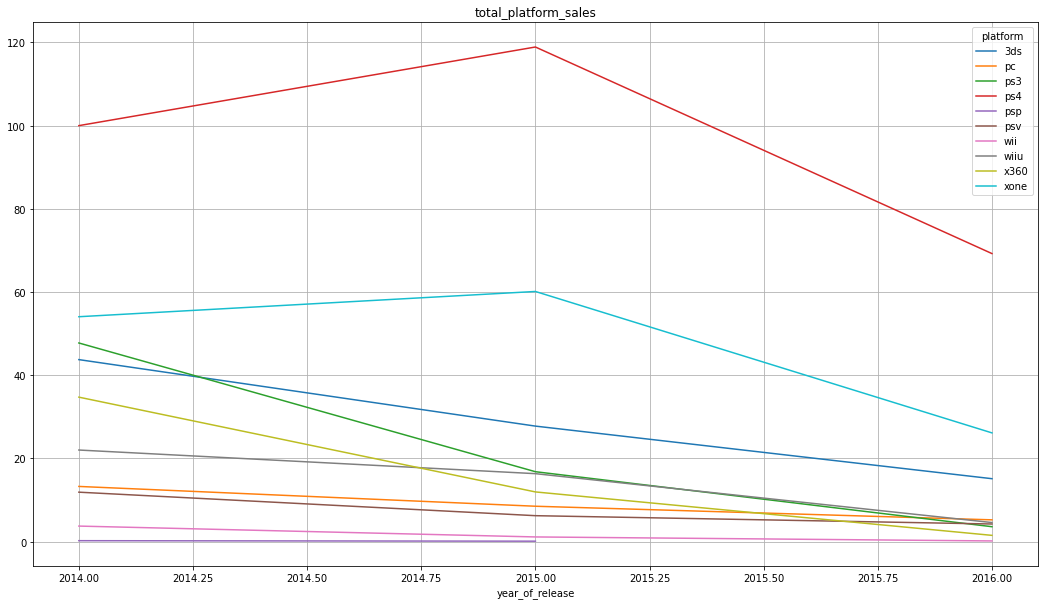

In [51]:
(good_data
    .query('year_of_release >= 2014')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(title='total_platform_sales', grid=True, figsize=(18, 10)));

Из полученного графика видим, что к концу 2016 г. наблюдается общая динамика спада продаж по всем платформам, при этом три платформы явно лидируют по продажам и являются потенциально прибыльными на 2017 г: 

In [52]:
perspective_platforms = (good_data
                 .query('year_of_release == 2016')
                 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                 .sort_values(by='total_sales', ascending=False).head(3))
perspective_platforms

,total_sales
platform,
ps4,69.25
xone,26.15
3ds,15.14


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам :

##### Построим график со всеми выбросами: 

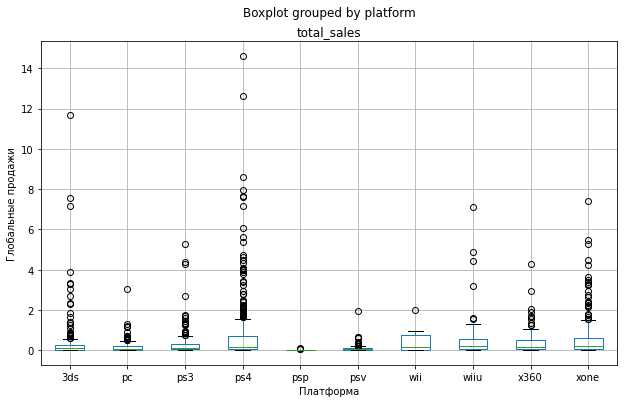

In [53]:
good_data.query('year_of_release >= 2014').boxplot(column='total_sales', by='platform', figsize=(10,6))
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

##### Для наглядности изменим масштаб графика, ограничив пределы по вертикали:

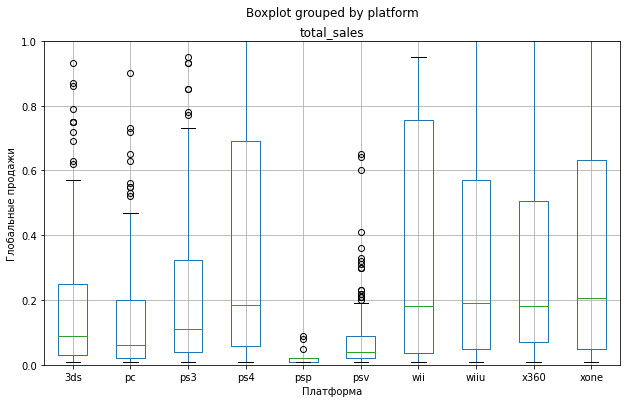

In [54]:
good_data.query('year_of_release >= 2014').boxplot(column='total_sales', by='platform', figsize=(10,6))
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim([0,1]);

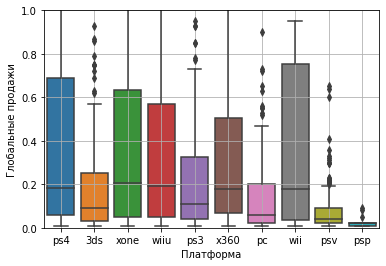

In [55]:
seaborn.boxplot(x='platform', y='total_sales', data=good_data.query('year_of_release >= 2014'))
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim([0,1])
plt.grid();

##### Посмотрим на границы размахов и медианные значения суммарных продаж по платформам:

In [56]:
good_data.query('year_of_release >= 2014').pivot_table(index='platform', values = 'total_sales', aggfunc = ['describe'])

describe                                                       
              25%    50%     75%  count    max      mean   min       std
platform                                                                
3ds        0.0300  0.090  0.2500  212.0  11.68  0.408868  0.01  1.188368
pc         0.0200  0.060  0.2000  151.0   3.05  0.179139  0.01  0.329359
ps3        0.0400  0.110  0.3250  219.0   5.27  0.311324  0.01  0.633059
ps4        0.0575  0.185  0.6900  376.0  14.63  0.766356  0.01  1.614969
psp        0.0100  0.020  0.0200   13.0   0.09  0.027692  0.01  0.027735
psv        0.0200  0.040  0.0900  295.0   1.96  0.075932  0.01  0.141591
wii        0.0350  0.180  0.7550   11.0   2.01  0.460909  0.01  0.625451
wiiu       0.0500  0.190  0.5700   73.0   7.09  0.588767  0.01  1.161467
x360       0.0700  0.180  0.5050  111.0   4.28  0.434414  0.01  0.628967
xone       0.0500  0.205  0.6325  228.0   7.39  0.615614  0.01  1.046513

Из графиков и численных значений видим, что размахи продаж сильно отличаются на разных платформах, при этом медианные значения в среднем примерно на одном уровне 0,1 - 0,2 млн копий. Большое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков :

Для анализа влияния оценок пользоваталей и критиков на продажи исследуем данные по платформе PS4, лидирующей по продажам к концу 2016 г. и являющейся потенциально прибыльной на 2017 г: 

##### Проанализируем зависимость объема продаж от оценок критиков:

Выберем для анализа данные без пропусков в оценках критиков:

In [57]:
data_for_critic_score_analysis = (good_data
                                  .query('year_of_release >= 2014 and platform == "ps4"')
                                  .dropna(subset=['critic_score']))

Построим диаграмму рассеяния:

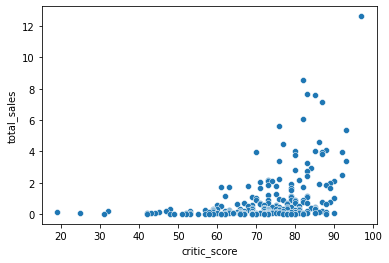

In [58]:
seaborn.scatterplot(x='critic_score', y='total_sales', data=data_for_critic_score_analysis);

Построим диаграмму рассеяния с линией регрессии:

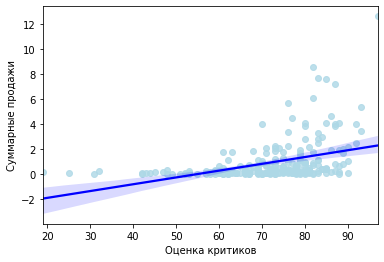

In [59]:
seaborn.regplot(
    x='critic_score', 
    y='total_sales', 
    data=data_for_critic_score_analysis, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Оценка критиков')
plt.ylabel(
    'Суммарные продажи')
plt.show()

Из диаграммы видно, что с ростом оценки критиков растет также и объем продаж, при этом также увеличивается разброс в продажах.

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [60]:
round(data_for_critic_score_analysis.critic_score.corr(data_for_critic_score_analysis.total_sales), 2)

0.4

Значение коэффициента корреляции также подтверждает наличие средней прямой зависимости между оценкой критиков и продажами игр.

##### Проанализируем зависимость объема продаж от оценок пользоваталей:

Выберем для анализа данные без пропусков в оценках пользоваталей:

In [61]:
data_for_user_score_analysis = (good_data
                                .query('year_of_release >= 2014 and platform == "ps4"')
                                .dropna(subset=['user_score']))

Построим диаграмму рассеяния:

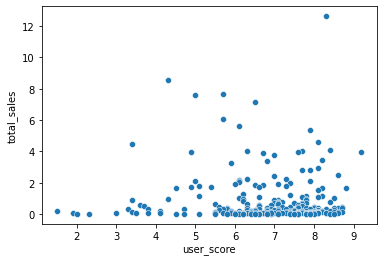

In [62]:
seaborn.scatterplot(x='user_score', y='total_sales', data=data_for_user_score_analysis);

Построим диаграмму рассеяния с линией регрессии:

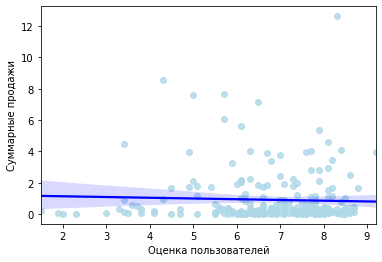

In [63]:
seaborn.regplot(
    x='user_score', 
    y='total_sales', 
    data=data_for_user_score_analysis, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Оценка пользователей')
plt.ylabel(
    'Суммарные продажи')
plt.show()

Из диаграммы видно, что с ростом оценки пользователей увеличивается разброс в продажах, но в среднем объем продаж остается на том же уровне.

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [64]:
round(data_for_user_score_analysis.user_score.corr(data_for_user_score_analysis.total_sales), 2)

-0.04

Значение коэффициента корреляции также подтверждает отсутствие зависимости между оценкой пользоваталей и продажами игр.

#### Оценим зависимость продаж от оценок пользователей и критиков  на других популярных платформах и сравним с ранее полученными выводами по лидирующей платформе:

In [65]:
perspective_platforms.index

Index(['ps4', 'xone', '3ds'], dtype='object', name='platform')

##### Рассчитаем коэффициент Пирсона для платформы `xone`:

In [66]:
data_for_critic_score_analysis_xone = (good_data
                                  .query('year_of_release >= 2014 and platform == "xone"')
                                  .dropna(subset=['critic_score']))

In [67]:
round(data_for_critic_score_analysis_xone.critic_score.corr(data_for_critic_score_analysis_xone.total_sales), 2)

0.43

Значение коэффициента корреляции также подтверждает наличие средней прямой зависимости между оценкой критиков и продажами игр.

In [68]:
data_for_user_score_analysis_xone = (good_data
                                .query('year_of_release >= 2014 and platform == "xone"')
                                .dropna(subset=['user_score']))

In [69]:
round(data_for_user_score_analysis_xone.user_score.corr(data_for_user_score_analysis_xone.total_sales), 2)

-0.07

Значение коэффициента корреляции также подтверждает отсутствие зависимости между оценкой пользоваталей и продажами игр.

##### Рассчитаем коэффициент Пирсона для платформы `3ds`:

In [70]:
data_for_critic_score_analysis_3ds = (good_data
                                  .query('year_of_release >= 2014 and platform == "3ds"')
                                  .dropna(subset=['critic_score']))

In [71]:
round(data_for_critic_score_analysis_3ds.critic_score.corr(data_for_critic_score_analysis_3ds.total_sales), 2)

0.31

Значение коэффициента корреляции также подтверждает наличие средней прямой зависимости между оценкой критиков и продажами игр.

In [72]:
data_for_user_score_analysis_3ds = (good_data
                                .query('year_of_release >= 2014 and platform == "3ds"')
                                .dropna(subset=['user_score']))

In [73]:
round(data_for_user_score_analysis_3ds.user_score.corr(data_for_user_score_analysis_3ds.total_sales), 2)

0.22

Значение коэффициента корреляции для платформы `3ds` говорит о наличии прямой средней зависимости между оценкой пользоваталей и продажами игр, что не совпадает с выводами по двум другим топовым платформам.

#### Исследуем распределение игр по жанрам:

##### Найдем жанры с наибольшими суммарными продажами:

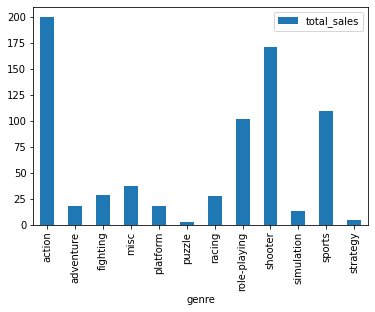

In [74]:
(good_data
 .query('year_of_release >= 2014')
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .plot(y='total_sales', kind='bar'));

Из гистограммы видно, что за период 2013-2016 гг. наболее продаваемыми оказались игры жанра `action` с суммарными продажами около 300 млн копий. Определим топ-5 самых продаваемых жанров:

In [75]:
top_genres = (good_data
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='total_sales', aggfunc='sum')
              .sort_values(by='total_sales', ascending=False).head(5))
top_genres

,total_sales
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55


##### Посмотрим на динамику продаж игр разных жанров по годам:

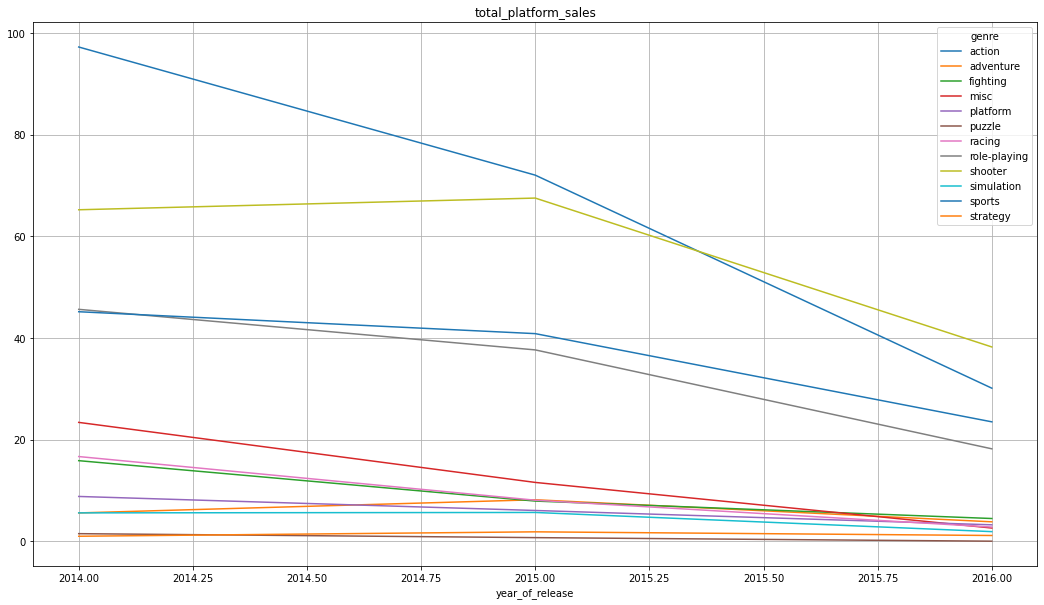

In [76]:
(good_data
    .query('year_of_release >= 2014')
    .pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')
    .plot(title='total_platform_sales', grid=True, figsize=(18, 10)));

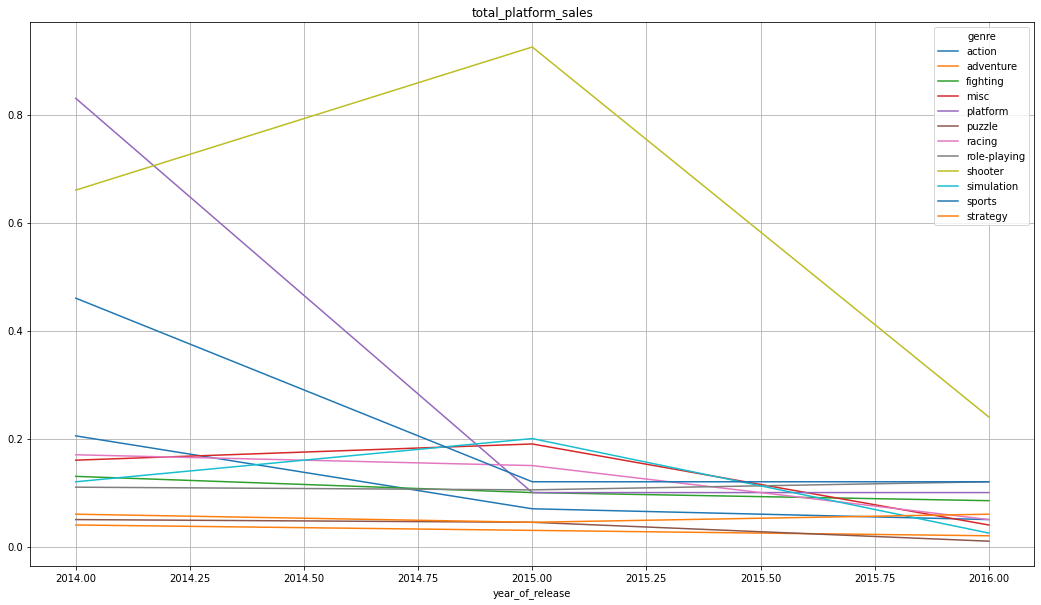

In [77]:
(good_data
    .query('year_of_release >= 2014')
    .pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='median')
    .plot(title='total_platform_sales', grid=True, figsize=(18, 10)));

Из графиков видно, что к концу 2016 г. жанр `action` перестал быть самым продаваемым, уступив по суммарным продажам первенство жарну `shooter`. Лидирование жанра `shooter` по медиане также говорит о преобладании к концу 2016 г. именно жанра в целом, а не конкретных отдельных игр этого жанра. в 2015-2016 гг. имелась общая тенденция снижения суммарных продаж с сохранением медианных продаж по всем жанрам, кроме `shooter` - можно предположить, что снижение суммарных продаж происходило за счет уменьшения количества выпускаемых игр, тогда как средние продажи отдельных игр в этот период оставались на прежнем уровне. В жанре `shooter` наблюдалось снижение и  суммарных и медианных продаж, но к концу 2016 он сохранил свое лидерство и все еще являлся потенциально прибыльным.

### Составим портрет пользователя каждого региона:

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5):

##### Оценим медианные и суммарные продажи по платформам для каждого региона:

In [78]:
(good_data
    .query('year_of_release >= 2014')
    .pivot_table(index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['median', 'sum'])
)

median                        sum                  
         eu_sales jp_sales na_sales eu_sales jp_sales na_sales
platform                                                      
3ds          0.00    0.055     0.00    16.12    44.24    22.64
pc           0.05    0.000     0.00    17.97     0.00     7.23
ps3          0.01    0.020     0.02    25.54    11.22    22.05
ps4          0.07    0.015     0.05   130.04    15.02    98.61
psp          0.00    0.020     0.00     0.00     0.36     0.00
psv          0.00    0.030     0.00     3.53    14.54     2.52
wii          0.12    0.000     0.04     2.59     0.00     2.08
wiiu         0.06    0.010     0.09    13.15     7.31    19.36
x360         0.05    0.000     0.10    15.49     0.08    28.30
xone         0.07    0.000     0.10    46.25     0.32    81.27

##### Определим топ-5 самых продаваемых платформ в Северной Америке:

In [79]:
top_platform_na = (good_data
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).head(5))
top_platform_na

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


##### Определим топ-5 самых продаваемых платформ в Европе:

In [80]:
top_platform_eu = (good_data
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).head(5))
top_platform_eu

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


##### Определим топ-5 самых продаваемых платформ в Японии:

In [81]:
top_platform_jp = (good_data
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).head(5))
top_platform_jp

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


##### Оценим различия между регионами в долях продаж по топ-5 платформам:

In [82]:
pivot_top_platform = (good_data
    .query('year_of_release >= 2014')
    .pivot_table(index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
pivot_top_platform

,eu_sales,jp_sales,na_sales
platform,,,
3ds,16.12,44.24,22.64
pc,17.97,0.00,7.23
ps3,25.54,11.22,22.05
ps4,130.04,15.02,98.61
psp,0.00,0.36,0.00
psv,3.53,14.54,2.52
wii,2.59,0.00,2.08
wiiu,13.15,7.31,19.36
x360,15.49,0.08,28.30


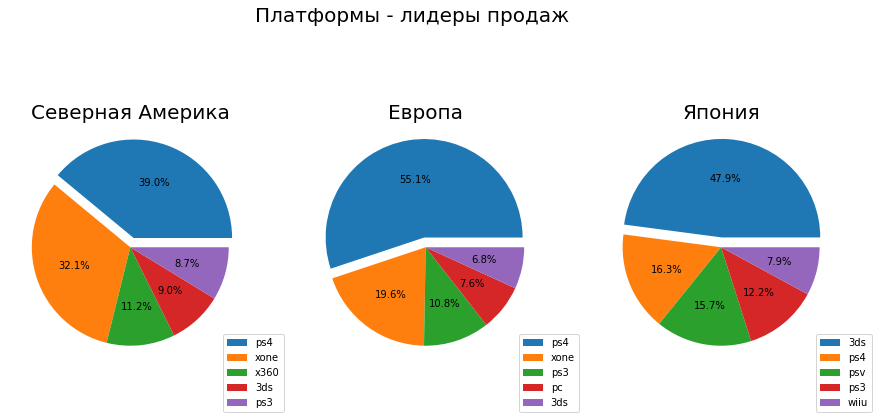

In [83]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Платформы - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
pivot_top_platform.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 2)
pivot_top_platform.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 3)
pivot_top_platform.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), legend=True, labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('');

Проанализоровав данные графиков и численные значения объемов продаж, получили следующие наблюдения:  
Платформы - лидеры продаж существенно отличаются в зависимости от региона. В Северной Америке и Европе самые популярные платформы PS4 и XOne, в Японии - 3DS и PS4, при этом игры платформы 3DS составляют почти половину от всех продаж ТОП-5 платформ в Японии, а игры платформы Xone (одного из лидеров рынка Северной Америки и Европы) - в Японии практически не продаются.

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5):

##### Оценим медианные и суммарные продажи по жанры для каждого региона:

In [84]:
(good_data
    .query('year_of_release >= 2014')
    .pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['median', 'sum'])
)

median                        sum                  
             eu_sales jp_sales na_sales eu_sales jp_sales na_sales
genre                                                             
action          0.020     0.01    0.010    74.68    29.58    72.53
adventure       0.000     0.01    0.000     6.49     3.60     5.64
fighting        0.020     0.03    0.040     6.69     6.37    12.43
misc            0.010     0.01    0.010    12.86     5.61    15.05
platform        0.055     0.00    0.075     6.80     2.69     6.79
puzzle          0.000     0.03    0.000     0.52     0.93     0.65
racing          0.050     0.00    0.030    14.13     1.76     8.74
role-playing    0.010     0.05    0.020    28.17    31.16    33.47
shooter         0.220     0.00    0.220    65.52     4.87    79.02
simulation      0.030     0.00    0.000     7.30     2.31     2.63
sports          0.050     0.00    0.070    45.73     3.26    46.13
strategy        0.010     0.00    0.000     1.79     0.95     0.98

##### Определим топ-5 самых продаваемых жанров в Северной Америке:

In [85]:
top_genre_na = (good_data
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).head(5))
top_genre_na

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


##### Определим топ-5 самых продаваемых жанров в Европе:

In [86]:
top_genre_eu = (good_data
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).head(5))
top_genre_eu

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


##### Определим топ-5 самых продаваемых жанров в Японии:

In [87]:
top_genre_jp = (good_data
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).head(5))
top_genre_jp

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


##### Оценим различия между регионами в долях продаж по топ-5 жанрам:

In [88]:
pivot_top_genre = (good_data
    .query('year_of_release >= 2014')
    .pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
pivot_top_genre

,eu_sales,jp_sales,na_sales
genre,,,
action,74.68,29.58,72.53
adventure,6.49,3.60,5.64
fighting,6.69,6.37,12.43
misc,12.86,5.61,15.05
platform,6.80,2.69,6.79
puzzle,0.52,0.93,0.65
racing,14.13,1.76,8.74
role-playing,28.17,31.16,33.47
shooter,65.52,4.87,79.02


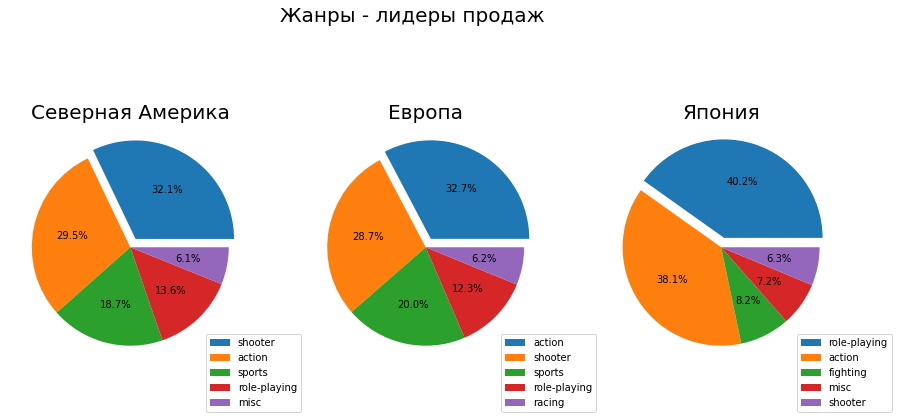

In [89]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Жанры - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
pivot_top_genre.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 2)
pivot_top_genre.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 3)
pivot_top_genre.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), legend=True, labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('');

Проанализировав данные графиков и численные значения объемов продаж, получили следующие наблюдения:  
Рынки продаж в Северной Америке и Европе совпадают по ТОП-5 жанрам,  и существенно отличаются рынка Японии. В Северной Америке и Европе самые популярные жанры Action и Shooter, а в Японии - Role-Playing и Action, при этом игры жанра Sports (одного из лидеров рынков Северной Америки и Европы) - в Японии продаются очень мало.

#### Оценим, как влияет рейтинг ESRB на продажи в отдельном регионе:

In [90]:
pivot_category = (good_data
    .query('year_of_release >= 2014')
    .pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
pivot_category

,eu_sales,jp_sales,na_sales
rating,,,
e,58.06,8.94,50.74
e10+,26.16,4.46,33.23
m,93.44,8.01,96.42
t,34.07,14.78,38.95
undef,58.95,56.90,64.72


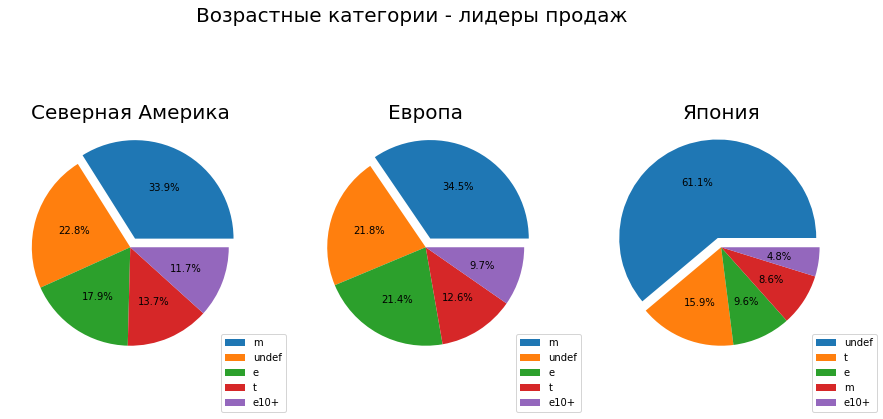

In [91]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Возрастные категории - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
pivot_category.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 2)
pivot_category.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')
 
plt.subplot(1, 3, 3)
pivot_category.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), legend=True, labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('');

Проанализировав данные графиков, получили следующие наблюдения:  
Рынки продаж в Северной Америке и Европе похожи по возрастным категориям игр  и существенно отличаются рынка Японии. В Северной Америке и Европе самые популярные игры относятся к категориям `M` («Для взрослых», 17+) и `E` («Для всех», 6+), при этом существенную долю продаж составляют игры без рейтинга ESRB. В Японии - абсолютно большая часть продаваемых игр также не имеют этого рейтинга. Это может быть связано с тем, что в Японии имеется своя категоризация игр по возрасту, либо категоризация игр по возрастным группам не является обязательным требованием в этой стране.

**Вывод по п. 4:**  
Проведя исследование ТОП-5 самых популярных платформ и жанров для каждого региона (NA, EU, JP) , а также оценив влияние рейтинга ESRB на продажи в отдельном регионе, можем составить портрет пользователя каждого региона:  
Типичный пользователь игр в Северной Америке приобретает игры платформ PS4 и XOne жанров Action, Shooter или Sports из возрастных категорий M («Для взрослых», 17+) и E («Для всех», 6+) или без рейтинга ESRB. 
Типичный пользователь игр в Европе приобретает игры платформ PS4 и XOne жанров Action, Shooter или Sports из возрастных категорий M («Для взрослых», 17+) и E («Для всех», 6+) или без рейтинга ESRB. 
Типичный пользователь игр в Японии приобретает игры платформ 3DS и PS4 жанра Role-Playing и Action, не имеющей рейтинга возрастных категорий ESRB. В Японии игры платформы Xone (одного из лидеров рынка Северной Америки и Европы) практически не продаются, игры жанра Sports (одного из лидеров рынков Северной Америки и Европы) - продаются очень мало. Абсолютно большая часть продаваемых игр в Японии не имеет рейтинга ESRB. Это может быть связано с тем, что в Японии имеется своя категоризация игр по возрасту, либо категоризация игр по возрастным группам не является обязательным требованием в этой стране.

Рынки продаж в Северной Америке и Европе совпадают по лидирующим жанрам, похожи по лидирующим платформам и возрастным категориям игр. Рынок Японии существенно отличается от рынка Северной Америки и Европы по всем вышеперечисленным пунктам. 

### Проверка гипотез

#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выберем для анализа данные без пропусков в оценках пользователей:

In [92]:
data_for_hypothesis = (good_data
                                  .query('year_of_release >= 2014')
                                  .dropna(subset=['user_score']))

Сформируем нулевую гипотезу (Н0) из условия равенства: средние оценки пользователей игр `user_score` платформы `xone` = средним оценкам пользователей игр платформы `pc`. 

Сформируем алтернативную гипотезу (Н1), которая проверяется, если отбрасывается Н0: средние оценки пользователей игр `user_score` платформы `xone` ≠ средним оценкам пользователей игр платформы `pc`.     

Т.к. нам требуется проверить гипотезу о равенстве среднего двух независимых выборок, то для ее проверки воспользуемся методом `ttest_ind` с параметром `equal_var=False`, т.е. есть основания предполагать, что их дисперсии разные. Зададим пороговое значение уровня значимости alpha = 0.05.

In [93]:
results = st.ttest_ind(data_for_hypothesis[data_for_hypothesis.platform =='xone']['user_score'],\
                       data_for_hypothesis[data_for_hypothesis.platform =='pc']['user_score'],\
                      equal_var=False)
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


P-value = 0.12. Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, больше порогового значения, т.е. данные не противоречат гипотезе, нулевую гипотезу отвергать не следует.

#### Проверка гипотезы: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформируем нулевую гипотезу (Н0) из условия равенства: средние оценки пользователей игр `user_score` жанров `action` = средним оценкам пользователей игр жанров `sports`.  

Сформируем альтернативную гипотезу (Н1), которая проверяется, если отбрасывается Н0: средние оценки пользователей игр `user_score` жанров `action` ≠ средним оценкам пользователей игр жанров `action`.   

Для проверки гипотезы также будем использовать метод `ttest_ind` с параметром `equal_var=False`, т.к. есть основания предполагать, что дисперсии этих двух выборок разные. Зададим пороговое значение уровня значимости alpha = 0.05.

In [94]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(data_for_hypothesis[data_for_hypothesis.genre =='action']['user_score'],\
                       data_for_hypothesis[data_for_hypothesis.genre =='sports']['user_score'],\
                      equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-value = 1.1825550382644557e-14. Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, существенно ниже порогового значения, т.е. нулевую гипотезу можно отвергнуть.

### Общий вывод

С целью мыявить определяющие успешность игры закономерности мы проанализировали о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 г.  
Перед проведением анализа и проверкой гипотез понадобился обзор и предобработка данных. До предобработки объем данных составлял 16715 строк, который в процессе обработки сократился  до 16444 строк.   
Проанализировав строки с пропусками и состав данных, сделали следующие предположения:   
Существенное число пропусков говорит о том, что они неслучайны и могли возникнуть по причине неполного заполнения данных, ошибки на этапе выгрузки данных, либо в результате неправильного запроса/объединения таблиц. Пропуски в столбце user_score и значения "tbd" (to be determined) несут в себе одну смысловую информацию (оценка не определена). Пропуски в графе rating могут быть связаны не только с ошибкой в данных, но и с тем, что для данных игр по каким-либо причинам оценка рейтинга ESRB не требовалась, либо при оценке игрового контента однозначно присвоить подходящую возрастную категорию не удалось.   
Избавились от пропусков в столбцах `name`,`genre` и `year_of_release`, составляющих незначительную часть данных. Пропуски в столбце rating заменили на значение 'undef'. Логичную замену в осталных столбцах предложить было невозможно, поэтому на данном этапе оставили эти значения пустыми.
Преобразовали типы данных в столбцах: данные в столбце `year_of_release` привели к типу int64, т.к. это всегда целые числа. Данные в столбце`critic_score` это тоже всегда целые числа, но, т.к. в них имелось большое количество пропусков,которые нельзя заменить логическими значениями и удалить также нельзя, - то на данном этапе оставили их float64. Изменили тип данных столбца `user_score` на float64, при этом значения "tbd" (to be determined) также стали NaN.
При проверке данных на дубликаты явных и неявных дубликатов обнаружено не было.   
Явные аномальные значения (отрицательные) не обнаружены.
Для последующего анализа посчитали и добавили в таблицу данные о суммарных продажах во всех регионах.

Далее провели исследовательский анализ данных:
1. Изучили, сколько игр выпускалось в разные годы: больше всего игр выпускалось в 2008 и 2009 гг. Доля игр, выпущенных до 1995 г., мала, и для анализа они не важны, исключили из набора эти значения.
2. Посмотрели, как менялись продажи по платформам: наболее продаваемыми оказались игры 6 платформ с суммарными продажами более 600 млн копий: ps2, x360, ps3, ds, wii, ps. Из графиков распределения продаж по годам для полученных платформ с наибольшими суммарными продажами обнаружили, что платформы появлялись и исчезали в разные годы, но в среднем период популярности платформы составлял 6-7 лет. Также из графиков получили наблюдение, что к 2013-2014 году самые популярные платформы практически исчезли из продаж. Для определения актуального периода для прогноза на 2017 г посмотрели динамику продаж по годам по всем платформам о обнаружили, что в 2013 г. начали появляться новые перспективные платформы.С учетом того, что компьютерные игры - это динамично меняющаяся индустрия,в качестве актуального периода для формирования прогноза на 2017 г. выбрали для анализа данные начиная с 2014 года.
3. Проанализировав данные по продажам игр разных платформ за актуальный период (начиная с 2014 года), выяснили, что к концу 2016 г. наблюдается общая динамика спада продаж по всем платформам, при этом три платформы явно лидируют по продажам и являются потенциально прибыльными на 2017 г: ps4, xone, 3ds.
4. Из графика «ящик с усами» по глобальным продажам игр в разбивке по платформам и численных значений обнаружили, что размахи продаж сильно отличаются на разных платформах, при этом медианные значения в среднем примерно на одном уровне 0,1 - 0,2 млн копий. Большое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи. 
5. Посмотрев, как влияют на продажи отзывы пользователей и критиков по платформе PS4, лидирующей по продажам к концу 2016 г. и являющейся потенциально прибыльной на 2017, выяснили, что что с ростом оценки критиков растет также и объем продаж, при этом также увеличивается разброс в продажах.Значение коэффициента корреляции также подтверждаило наличие средней прямой зависимости между оценкой критиков и продажами игр. Проанализировав зависимость объема продаж от оценок пользоваталей по этой же платформе, увидели, что с ростом оценки пользователей увеличивается разброс в продажах, но в среднем объем продаж остается на том же уровне. Значение коэффициента корреляции также подтверждило отсутствие зависимости между оценкой пользоваталей и продажами игр.
6. Оценив аналогичные зависимости на других популярных платформах, обнаружили, что значение для платформы xone также подтверждилось отсутствие зависимости между оценкой пользоваталей и продажами игр.А коэффициент корреляции для платформы 3ds показал на наличие прямой средней зависимости между оценкой пользоваталей и продажами игр, что не совпало с выводами по двум другим топовым платформам.
7. Исследовав распределение игр по жанрам, высянили, что за период 2014-2016 гг. наболее продаваемыми оказались игры жанра action с суммарными продажами около 200 млн копий, а в топ-5 самых продаваемых жанров вошли: action, shooter, sports, role-playing, misc. Посмотрев на динамику продаж игр разных жанров по годам, обнаружили, что к концу 2016 г. жанр action перестал быть самым продаваемым, уступив по суммарным продажам первенство жарну shooter. Лидирование жанра shooter по медиане также говорит о преобладании к концу 2016 г. именно жанра в целом, а не конкретных отдельных игр этого жанра. в 2015-2016 гг. имелась общая тенденция снижения суммарных продаж с сохранением медианных продаж по всем жанрам, кроме shooter - можно предположить, что снижение суммарных продаж происходило за счет уменьшения количества выпускаемых игр, тогда как средние продажи отдельных игр в этот период оставались на прежнем уровне. В жанре shooter наблюдалось снижение и суммарных и медианных продаж, но к концу 2016 он сохранил свое лидерство и все еще являлся потенциально прибыльным.

Далее составили портрет пользователя каждого региона:   

Проведя исследование ТОП-5 самых популярных платформ и жанров для каждого региона (NA, EU, JP) , а также оценив влияние рейтинга ESRB на продажи в отдельном регионе, можем составить портрет пользователя каждого региона:
Типичный пользователь игр в Северной Америке приобретает игры платформ PS4 и XOne жанров Action, Shooter или Sports из возрастных категорий M («Для взрослых», 17+) и E («Для всех», 6+) или без рейтинга ESRB. Типичный пользователь игр в Европе приобретает игры платформ PS4 и XOne жанров Action, Shooter или Sports из возрастных категорий M («Для взрослых», 17+) и E («Для всех», 6+) или без рейтинга ESRB. Типичный пользователь игр в Японии приобретает игры платформ 3DS и PS4 жанра Role-Playing и Action, не имеющей рейтинга возрастных категорий ESRB. В Японии игры платформы Xone (одного из лидеров рынка Северной Америки и Европы) практически не продаются, игры жанра Sports (одного из лидеров рынков Северной Америки и Европы) - продаются очень мало. Абсолютно большая часть продаваемых игр в Японии не имеет рейтинга ESRB. Это может быть связано с тем, что в Японии имеется своя категоризация игр по возрасту, либо категоризация игр по возрастным группам не является обязательным требованием в этой стране.
Рынки продаж в Северной Америке и Европе совпадают по лидирующим жанрам, похожи по лидирующим платформам и возрастным категориям игр. Рынок Японии существенно отличается от рынка Северной Америки и Европы по всем вышеперечисленным пунктам.

Далее выполнили проверку гипотез:
1. Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Сформировав нулевую гипотезу (Н0) как: средние оценки пользователей игр user_score платформы xone = средним оценкам пользователей игр платформы pc. И альтернативную гипотезу (Н1) как: средние оценки пользователей игр user_score платформы xone ≠ средним оценкам пользователей игр платформы pc - получили значение P-value = 0.12. Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, больше порогового значения, т.е. данные не противоречат гипотезе, нулевую гипотезу опровергнуть не получилось. 
2. Проверка гипотезы: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.   
Сформировав нулевую гипотезу (Н0) как: средние оценки пользователей игр user_score жанров action = средним оценкам пользователей игр жанров sports. И альтернативную гипотезу (Н1), как: средние оценки пользователей игр user_score жанров action ≠ средним оценкам пользователей игр жанров action - получили значение P-value = 1.1825550382644557e-14. Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, существенно ниже порогового значения, т.е. нулевую гипотезу можно отвергнуть.
